# Ödev 2: K-Means ve California Housing Dataset

Bu ödevde California housing veri setini, Kmeans algoritmasını kullanarak ekonomik segmentlere ayırmanız gerekmektedir. Alt görevler:

1. Verisetini kullanarak farklı cluster sayılarında KMeans clusterları eğit (2-8 arası iyi bir seçim)
2. Her bir KMeans için silhouette skorunu çıkar ve görselleştir. Eğer istersen Silhouette grafiğini de çıkarabilirsin.
3. Farklı cluster sayılarının, segmentasyona etkilerini incele. Örneğin cluster sayısı 2 olduğunda haritayı 2'ye bölüp yukarıdakiler ve aşağıdakiler şeklinde ayırıyor, 3 olduğunda ise yukarıdakiler, aşağıdakiler ve zenginler gibi ayırıyor. Bol bol keşfet!

In [1]:
from sklearn.datasets import fetch_california_housing

dataset  = fetch_california_housing(as_frame = True)

In [2]:
X = dataset.data
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


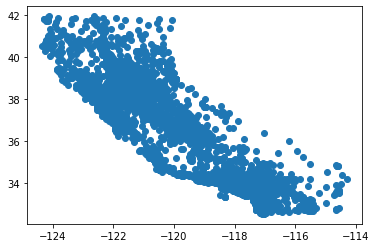

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X['Longitude'],X['Latitude'])

In [4]:
X = X.loc[:, ["MedInc", "Latitude", "Longitude"]]

In [5]:
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


## Kolay gelsin!

In [6]:
from sklearn.cluster import KMeans

In [7]:
#It creates eight different cluster sizes of Kmeans objects and stores them in the all_experiments list.
all_experiments = []
for i in range(2, 9):
    kmeans_cluster = KMeans(n_clusters=i, random_state=42).fit(X)
    all_experiments.append(kmeans_cluster)

In [8]:
all_experiments

[KMeans(n_clusters=2, random_state=42),
 KMeans(n_clusters=3, random_state=42),
 KMeans(n_clusters=4, random_state=42),
 KMeans(n_clusters=5, random_state=42),
 KMeans(n_clusters=6, random_state=42),
 KMeans(n_clusters=7, random_state=42),
 KMeans(random_state=42)]

In [10]:
import matplotlib.pyplot as plt

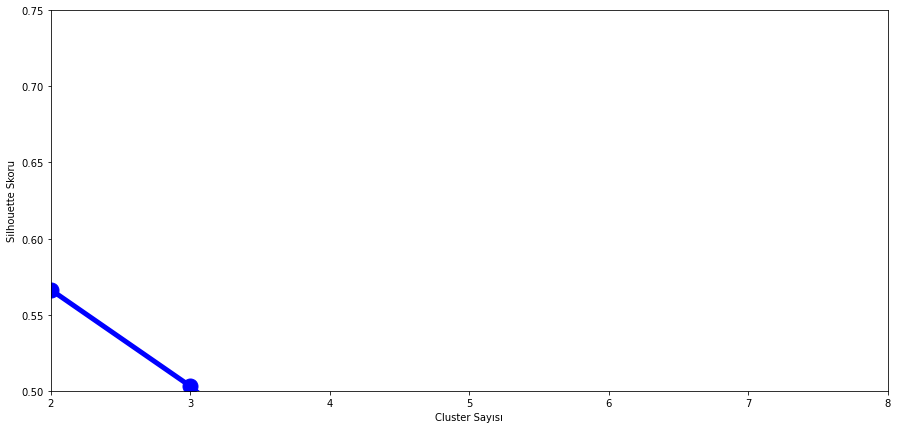

In [11]:
#Obtains the silhouette score and visualizes that score.
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X, experiment.labels_) for experiment in all_experiments]
plt.figure(figsize=(15, 7))
plt.plot([2, 3, 4, 5, 6, 7, 8], silhouette_scores, 'bo-', linewidth=5, markersize=15)
plt.axis([2, 8, 0.5, 0.75])
plt.xlabel('Cluster Sayısı')
plt.ylabel('Silhouette Skoru')
plt.show()

In [12]:
silhouette_scores

[0.5665094919763822,
 0.5031377784869998,
 0.42479266774390956,
 0.37499496469067656,
 0.39921715268109526,
 0.36301093520302097,
 0.34461644721746776]

In [19]:
#Pandas DataFrame To NumPy array
X = X.values

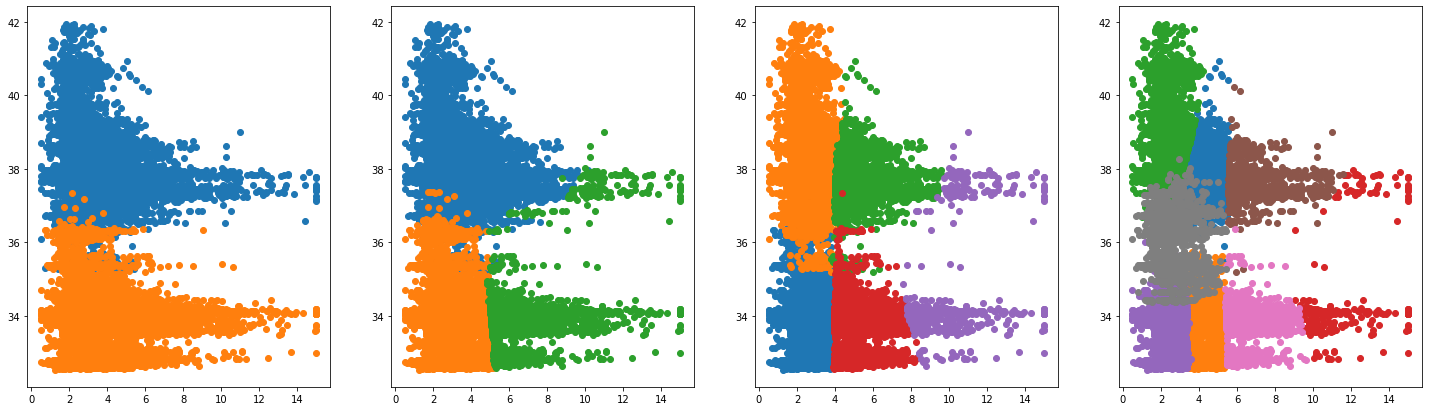

In [33]:
#It creates four different kmeans objects and visualizes the segmentation of these created clusters.
kmeans = KMeans(n_clusters=2)
labels_2 = kmeans.fit_predict(X)

kmeans = KMeans(n_clusters=3)
labels_3 = kmeans.fit_predict(X)

kmeans = KMeans(n_clusters=5)
labels_5 = kmeans.fit_predict(X)


kmeans = KMeans(n_clusters=8)
labels_8 = kmeans.fit_predict(X)

# plot 3
figure, subplots = plt.subplots(1, 4, figsize =(25,7))

unique_labels = set(labels_2)
for label in unique_labels:
    subplots[0].scatter(X[labels_2==label,0], X[labels_2==label,1])

unique_labels = set(labels_3)
for label in unique_labels:
    subplots[1].scatter(X[labels_3==label,0], X[labels_3==label,1])

unique_labels = set(labels_5)
for label in unique_labels:
    subplots[2].scatter(X[labels_5==label,0], X[labels_5==label,1])

unique_labels = set(labels_8)
for label in unique_labels:
    subplots[3].scatter(X[labels_8==label,0], X[labels_8==label,1])